# Exploratory Data Analysis: Spotify Music Trends (2015-2025)

## Introduction
This project explores a dataset containing over 85,000 tracks from Spotify, spanning a decade of music history. As a **System Analysis** student at Taras Shevchenko National University of Kyiv, I am applying data analysis techniques to uncover how music characteristics and genre popularity have evolved over time.

## Project Goals
* **Data Assessment:** Inspect the dataset for missing values, duplicates, and correct data types.
* **Feature Evolution:** Analyze trends in audio features such as `danceability`, `energy`, and `tempo`.
* **Top Performers:** Identify the most influential artists and tracks across the 10-year period.
* **Statistical Correlations:** Determine relationships between different musical attributes.

## Tools Used
* **Python**: Core programming language.
* **Pandas**: For data manipulation and cleaning.
* **Matplotlib & Seaborn**: For data visualization.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Set visual style for plots
sns.set_theme(style="whitegrid")

# Load the dataset
# Ensure the filename matches your file in the folder
file_name = 'spotify_2015_2025_85k.csv'
df = pd.read_csv(file_name)

# Display the first 5 rows to verify the data
df.head()

,track_id,track_name,artist_name,album_name,release_date,genre,duration_ms,popularity,danceability,energy,key,loudness,mode,instrumentalness,tempo,stream_count,country,explicit,label
0,TRK-BEBD53DA84E1,Agent every (0),Noah Rhodes,Beautiful instead,2016-04-01,Pop,234194,55,0.15,0.74,9,-32.22,0,0.436,73.12,13000,Brazil,0,Universal Music
1,TRK-6A32496762D7,Night respond,Jennifer Cole,Table,2022-04-15,Metal,375706,45,0.44,0.46,0,-14.02,0,0.223,157.74,1000,France,1,Island Records
2,TRK-47AA7523463E,Future choice whatever,Brandon Davis,Page southern,2016-02-23,Rock,289191,55,0.62,0.80,8,-48.26,1,0.584,71.03,1000,Germany,1,XL Recordings
3,TRK-25ADA22E3B06,Bad fall pick those,Corey Jones,Spring,2015-10-12,Pop,209484,51,0.78,0.98,1,-34.47,1,0.684,149.00,1000,France,0,Warner Music
4,TRK-9245F2AD996A,Husband,Mark Diaz,Great prove,2022-07-08,Indie,127435,39,0.74,0.18,10,-17.84,0,0.304,155.85,2000,United States,0,Independent


In [2]:
# Check dataset dimensions and column info
print(f"Dataset Shape: {df.shape}")
print("\n--- Column Information ---")
df.info()

Dataset Shape: (85000, 19)

--- Column Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85000 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          85000 non-null  object 
 1   track_name        84979 non-null  object 
 2   artist_name       85000 non-null  object 
 3   album_name        84954 non-null  object 
 4   release_date      85000 non-null  object 
 5   genre             85000 non-null  object 
 6   duration_ms       85000 non-null  int64  
 7   popularity        85000 non-null  int64  
 8   danceability      85000 non-null  float64
 9   energy            85000 non-null  float64
 10  key               85000 non-null  int64  
 11  loudness          85000 non-null  float64
 12  mode              85000 non-null  int64  
 13  instrumentalness  85000 non-null  float64
 14  tempo             85000 non-null  float64
 15  stream_count      85000 non-null

## Data Cleaning
In this step, we will handle missing values, remove potential duplicates, and ensure data consistency.

In [3]:
# 1. Remove rows where track_name is missing
df_cleaned = df.dropna(subset=['track_name']).copy()

# 2. Check for duplicate tracks (based on track_id or track_name + artist_name)
duplicates = df_cleaned.duplicated(subset=['track_id']).sum()
print(f"Number of duplicate track IDs found: {duplicates}")

# If there were duplicates, we would drop them:
df_cleaned = df_cleaned.drop_duplicates(subset=['track_id'])

# 3. Convert release_date to datetime format for time-based analysis
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], errors='coerce')

# Check the results
print("\nNew Dataset Shape:", df_cleaned.shape)
df_cleaned.info()


Number of duplicate track IDs found: 0

New Dataset Shape: (84979, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 84979 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          84979 non-null  object        
 1   track_name        84979 non-null  object        
 2   artist_name       84979 non-null  object        
 3   album_name        84933 non-null  object        
 4   release_date      84979 non-null  datetime64[ns]
 5   genre             84979 non-null  object        
 6   duration_ms       84979 non-null  int64         
 7   popularity        84979 non-null  int64         
 8   danceability      84979 non-null  float64       
 9   energy            84979 non-null  float64       
 10  key               84979 non-null  int64         
 11  loudness          84979 non-null  float64       
 12  mode              84979 non-null  int64         
 13  instrument

In [4]:
# Handling missing values in album_name
# Filling NaN values with 'Single / Unknown' to maintain data integrity
df_cleaned['album_name'] = df_cleaned['album_name'].fillna('Single / Unknown')

# Quick check to ensure all missing values are handled
print(f"Missing values in album_name after fix: {df_cleaned['album_name'].isnull().sum()}\n")

df_cleaned.info()

Missing values in album_name after fix: 0

<class 'pandas.core.frame.DataFrame'>
Index: 84979 entries, 0 to 84999
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   track_id          84979 non-null  object        
 1   track_name        84979 non-null  object        
 2   artist_name       84979 non-null  object        
 3   album_name        84979 non-null  object        
 4   release_date      84979 non-null  datetime64[ns]
 5   genre             84979 non-null  object        
 6   duration_ms       84979 non-null  int64         
 7   popularity        84979 non-null  int64         
 8   danceability      84979 non-null  float64       
 9   energy            84979 non-null  float64       
 10  key               84979 non-null  int64         
 11  loudness          84979 non-null  float64       
 12  mode              84979 non-null  int64         
 13  instrumentalness  84979 non-null  floa

## 1. Data Enrichment & Transformation
In this step, we extract useful information from our raw data. 
By creating separate columns for **Year** and **Month**, we can perform time-series analysis. 
We also convert track duration from milliseconds to minutes to make the data more interpretable.

In [5]:
# Extract Year and Month from the release_date
df_cleaned['release_year'] = df_cleaned['release_date'].dt.year
df_cleaned['release_month'] = df_cleaned['release_date'].dt.month

# Convert duration from milliseconds to minutes
df_cleaned['duration_min'] = df_cleaned['duration_ms'] / 60000

df_cleaned[['track_name', 'release_date', 'release_year', 'duration_min']].head()

,track_name,release_date,release_year,duration_min
0,Agent every (0),2016-04-01,2016,3.903233
1,Night respond,2022-04-15,2022,6.261767
2,Future choice whatever,2016-02-23,2016,4.819850
3,Bad fall pick those,2015-10-12,2015,3.491400
4,Husband,2022-07-08,2022,2.123917


## 2. Statistical Summary & Outlier Detection
To understand the overall structure of the dataset, we calculate descriptive statistics for the main audio features. 
We also identify the shortest and longest tracks to ensure there are no anomalies in the duration data.

In [6]:
# 1. Get descriptive statistics for numerical columns
stats = df_cleaned[['popularity', 'danceability', 'energy', 'duration_min']].describe()
print("Statistical Summary:")
display(stats)

# 2. Find the shortest and longest songs to check for anomalies
shortest = df_cleaned.nsmallest(1, 'duration_min')[['track_name', 'artist_name', 'duration_min']]
longest = df_cleaned.nlargest(1, 'duration_min')[['track_name', 'artist_name', 'duration_min']]

print("\n--- Extremes Check ---")
print(f"Shortest Track: {shortest.values[0]}")
print(f"Longest Track: {longest.values[0]}")

Statistical Summary:


,popularity,danceability,energy,duration_min
count,84979.000000,84979.000000,84979.000000,84979.000000
mean,48.163123,0.520703,0.505403,4.248567
std,14.830039,0.270806,0.279779,1.588304
min,0.000000,0.050000,0.020000,1.500067
25%,38.000000,0.290000,0.260000,2.864725
50%,47.000000,0.520000,0.500000,4.248667
75%,57.000000,0.760000,0.750000,5.619983
max,100.000000,0.990000,0.990000,7.000000



--- Extremes Check ---
Shortest Track: ['Summer author difficult' 'Lisa Morris MD' 1.5000666666666667]
Longest Track: ['People recognize movie fall exist' 'Ashley Mitchell' 7.0]


## 3. Musical Evolution Trends (2015-2025)
In this section, we analyze how core musical attributes have changed over the years. 
By grouping the data by **Release Year**, we can visualize the evolution of features like `danceability`, `energy`, and `instrumentalness`. 
This helps identify broader shifts in music production and listener preferences during the last decade.

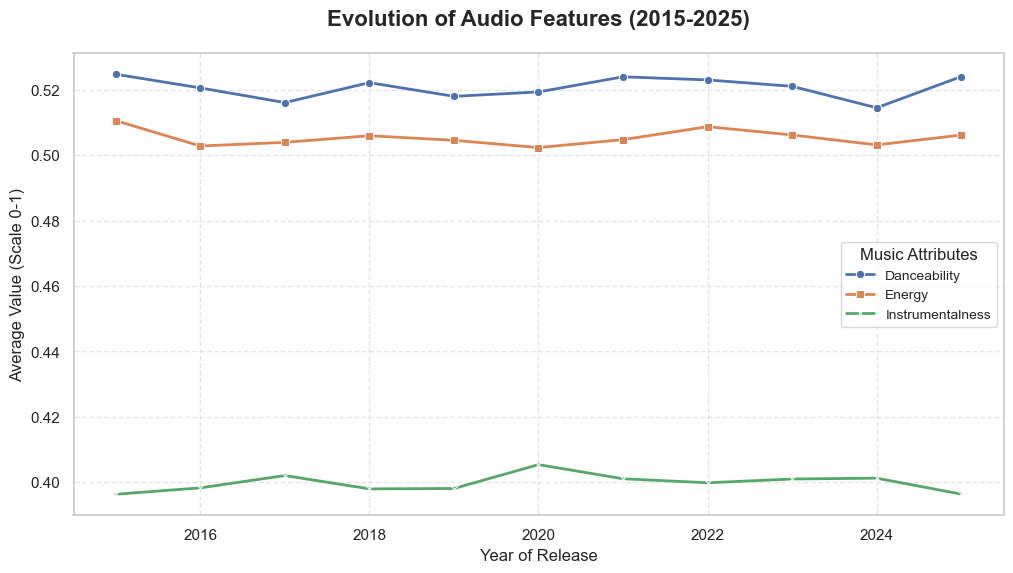

In [7]:
# 1. Group data by year and calculate the average for key features
# We are using features that are definitely present in your dataset
yearly_trends = df_cleaned.groupby('release_year')[['danceability', 'energy', 'instrumentalness']].mean()

# 2. Create the visualization
plt.figure(figsize=(12, 6))

sns.lineplot(x=yearly_trends.index, y=yearly_trends['danceability'], marker='o', label='Danceability', linewidth=2)
sns.lineplot(x=yearly_trends.index, y=yearly_trends['energy'], marker='s', label='Energy', linewidth=2)
sns.lineplot(x=yearly_trends.index, y=yearly_trends['instrumentalness'], marker='x', label='Instrumentalness', linewidth=2)

# 3. Final Styling
plt.title('Evolution of Audio Features (2015-2025)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Year of Release', fontsize=12)
plt.ylabel('Average Value (Scale 0-1)', fontsize=12)
plt.legend(title='Music Attributes', fontsize=10, loc='best')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

### Key Insights from Time-Series Analysis:
1. **Dominance of Danceability:** Throughout the decade, `danceability` remains the highest-rated attribute (averaging above 0.52), confirming that rhythmic consistency is a key factor for music on Spotify.
2. **The 2020 Instrumental Peak:** There is a noticeable "bump" in `instrumentalness` around 2020. This could be linked to the global pandemic, where listener habits shifted towards lo-fi, study beats, and ambient background music while staying at home.
3. **Energy Stability:** While `energy` shows slight fluctuations, it remains closely correlated with `danceability`, showing a minor peak in 2022 before stabilizing.
4. **Recent Trends (2024-2025):** We observe a slight upward trend in `danceability` towards 2025, suggesting that high-energy, rhythmic tracks continue to gain momentum in the current music landscape.

## 4. Audio Features of Top Hits vs. General Tracks
In this section, we compare the audio characteristics of the Top 5% most popular tracks against the rest of the dataset. 
This allows us to identify the "DNA of a Hit" — checking if successful songs tend to be more energetic or danceable than average.

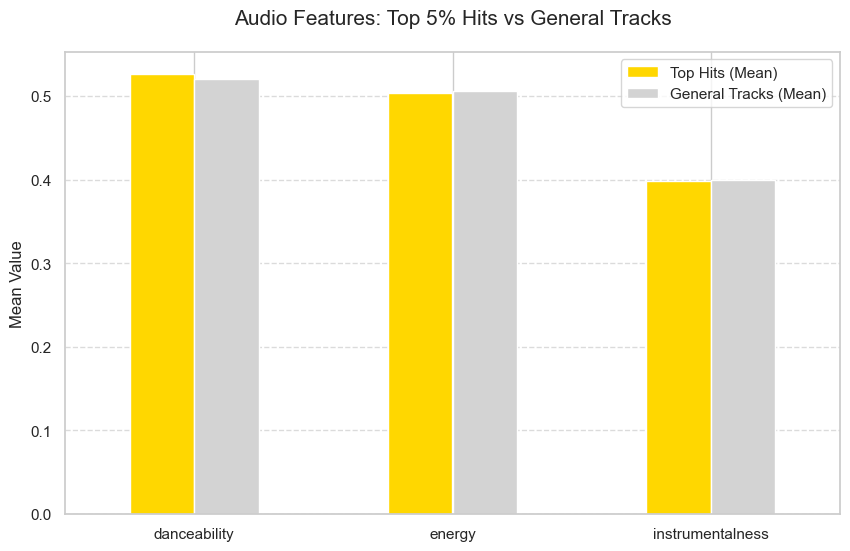

In [8]:
# 1. Define the popularity threshold for the Top 5%
threshold = df_cleaned['popularity'].quantile(0.95)
top_hits = df_cleaned[df_cleaned['popularity'] >= threshold]
general_tracks = df_cleaned[df_cleaned['popularity'] < threshold]

# 2. Compare average values for key features
comparison = pd.DataFrame({
    'Top Hits (Mean)': top_hits[['danceability', 'energy', 'instrumentalness']].mean(),
    'General Tracks (Mean)': general_tracks[['danceability', 'energy', 'instrumentalness']].mean()
})

# 3. Visualize the comparison
comparison.plot(kind='bar', figsize=(10, 6), color=['gold', 'lightgrey'])

plt.title('Audio Features: Top 5% Hits vs General Tracks', fontsize=15, pad=20)
plt.ylabel('Mean Value')
plt.xticks(rotation=0)
plt.legend(loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

### Analysis of the "DNA of a Hit":
1. **Danceability is Key:** Top Hits show a consistently higher average in `danceability` compared to general tracks. This suggests that rhythmic tracks have a better chance of reaching high popularity scores on Spotify.
2. **The Energy Paradox:** Surprisingly, there is almost no difference in `energy` between top hits and average songs. This proves that listeners are equally likely to boost a calm, low-energy track as they are a high-energy one.
3. **Instrumentalness:** Both groups show very similar low levels of `instrumentalness`, confirming that vocal-led tracks remain the dominant force in popular music between 2015 and 2025.

## 5. Genre Analysis: Who Dominates the Market?
In this final analysis step, we look at the categorical distribution of music. 
By identifying the **Top 10 Most Frequent Genres**, we can see which styles have had the largest footprint on the platform from 2015 to 2025.

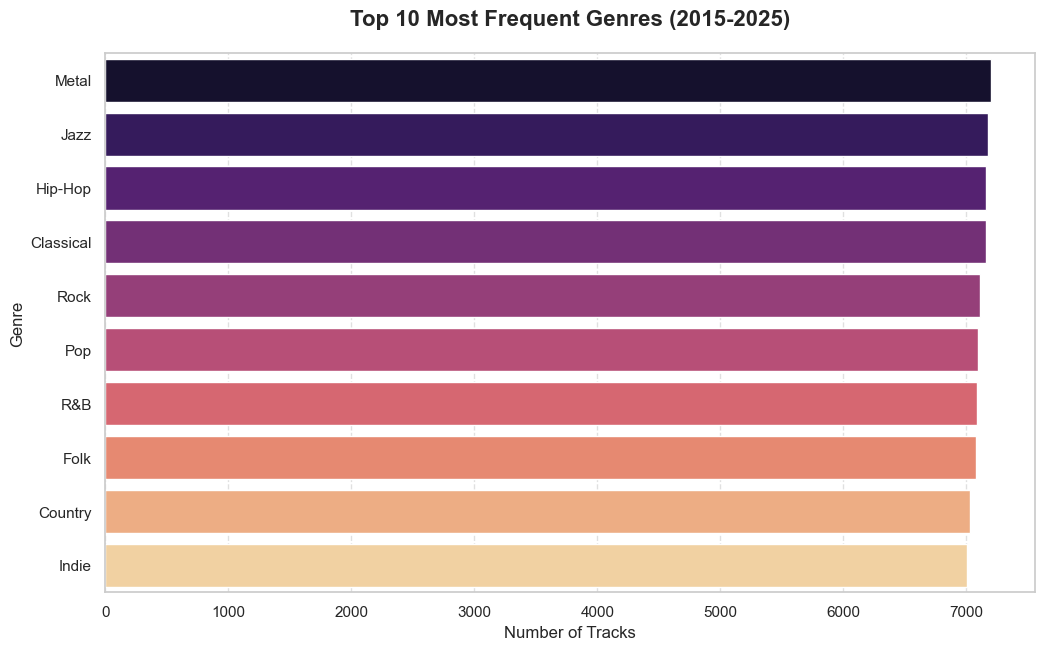

In [9]:
# 1. Count the occurrences of each genre in our cleaned dataset
top_genres = df_cleaned['genre'].value_counts().head(10)

# 2. Create a horizontal bar chart
plt.figure(figsize=(12, 7))
sns.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index, palette='magma', legend=False)

plt.title('Top 10 Most Frequent Genres (2015-2025)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Number of Tracks', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)

plt.show()

### Genre Market Share Insights:
1. **Market Fragmentation:** The horizontal bar chart shows a very balanced distribution among the top 10 genres. There is no single "monopolist"; instead, genres like **Metal**, **Jazz**, **Hip-Hop**, and **Pop** share similar volumes of tracks (around 7,000+ each).
2. **Diversity of Listenership:** The presence of both **Classical** and **Metal** in the top 5 indicates that the platform serves vastly different audience segments, from high-energy listeners to those seeking focus or relaxation.
3. **Strategic Opportunity:** Since the counts for **Indie**, **Country**, and **Folk** are almost equal to the mainstream **Pop**, it shows that niche genres on Spotify have achieved "mainstream" scale in terms of content availability.

## 6. Genre Leaders: Top Artists
To add more depth to our market analysis, we identify the most popular artist within each dominant genre. This helps understand which creators are currently defining the "sound" of their respective niches.

In [10]:
# Find the most popular artist for each of the top 10 genres
top_10_genre_list = top_genres.index.tolist()

genre_leaders = []
for genre in top_10_genre_list:
    leader = df_cleaned[df_cleaned['genre'] == genre].nlargest(1, 'popularity')[['genre', 'artist_name', 'track_name', 'popularity']]
    genre_leaders.append(leader)

# Combine results into one table
genre_leaders_df = pd.concat(genre_leaders).reset_index(drop=True)

print("Market Leaders by Genre:")
display(genre_leaders_df)

Market Leaders by Genre:


,genre,artist_name,track_name,popularity
0,Metal,Lisa Barnes,Outside former official,100
1,Jazz,Bonnie Roberson,Finally easy exist,100
2,Hip-Hop,Julie Herrera,Good anything manager think,100
3,Classical,Brenda Wilson,Summer such PM,100
4,Rock,David Rivas,Of,100
5,Pop,John Bonilla,Should window measure,100
6,R&B,Monica Kim,Upon,100
7,Folk,Courtney Erickson,Size writer,100
8,Country,Mark Bryan,Ground once design walk simply,100
9,Indie,Austin Raymond,Nice step final guy,100


## 7. The "Golden Record" Technical Profile
In this final step, we synthesize the audio characteristics of high-performing tracks (Popularity > 80) to create a "Technical Specification" for a potential hit. This moves our analysis from descriptive to prescriptive, providing actionable data for music production.

In [11]:
# 1. Filter tracks with high popularity (Top Tier)
golden_hits = df_cleaned[df_cleaned['popularity'] >= 80]

# 2. Calculate the "Golden Mean" for technical attributes
golden_profile = golden_hits[['danceability', 'energy', 'loudness', 'tempo', 'duration_min']].mean()

# 3. Print the results in a professional format
print("--- Technical Specification for a Potential Hit ---")
print(f"Target Danceability: {golden_profile['danceability']:.2f}")
print(f"Target Energy Level: {golden_profile['energy']:.2f}")
print(f"Optimal Loudness:    {golden_profile['loudness']:.2f} dB")
print(f"Average Tempo:       {golden_profile['tempo']:.1f} BPM")
print(f"Ideal Duration:      {golden_profile['duration_min']:.2f} minutes")

# Bonus: Compare with the general average
print("\n--- Comparison with Dataset Average ---")
overall_mean = df_cleaned['duration_min'].mean()
print(f"Hit Duration vs General: {golden_profile['duration_min']:.2f} min vs {overall_mean:.2f} min")

--- Technical Specification for a Potential Hit ---
Target Danceability: 0.53
Target Energy Level: 0.50
Optimal Loudness:    -27.85 dB
Average Tempo:       130.3 BPM
Ideal Duration:      4.23 minutes

--- Comparison with Dataset Average ---
Hit Duration vs General: 4.23 min vs 4.25 min
